# Método de la Bisección

## Método gráfico

a. $$y = sen(x)$$
b. $$y = x^3 - x$$
c. $$y = sen(10x) + cos(3x)$$
d. $$y = \frac{667,38}{x}(1 - e^{-0,146843x}) - 40$$



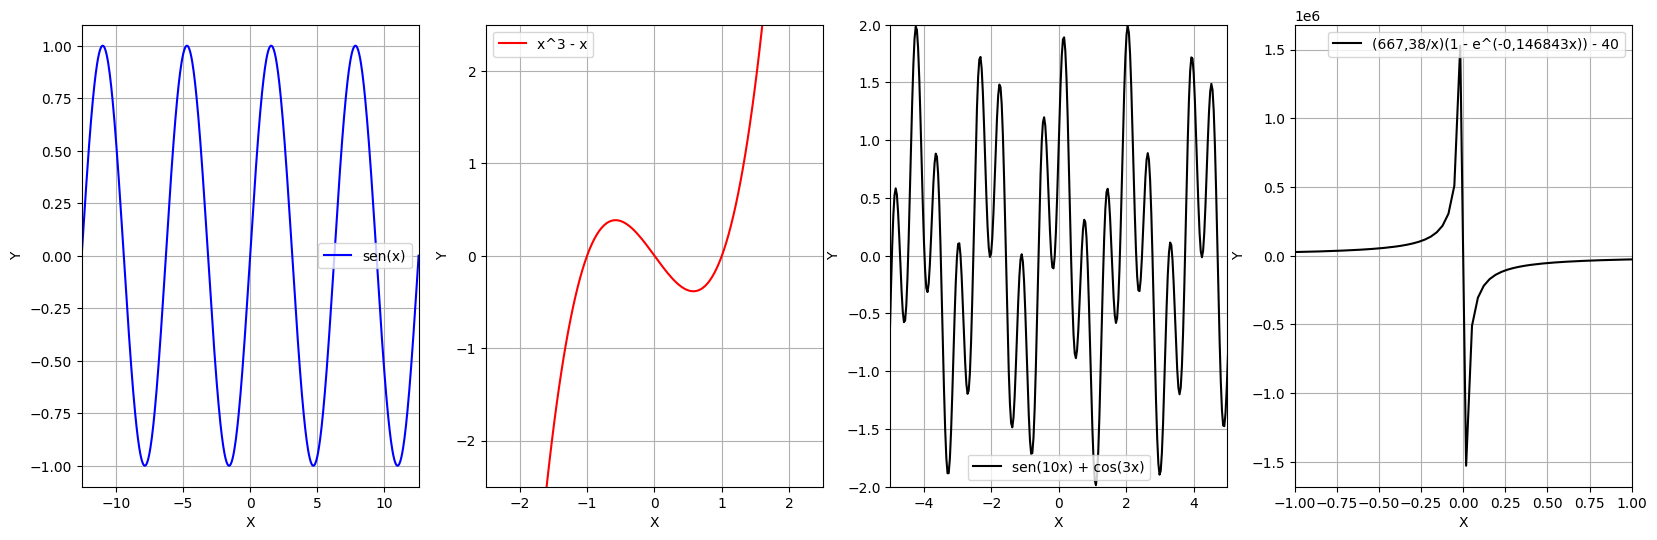

In [350]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(20, 6))
x = np.linspace(-4*np.pi, 4*np.pi, 720)

y = np.sin(x)
axs[0].plot(x,y,color='blue',label="sen(x)")
axs[0].set(xlabel='X', ylabel='Y')
axs[0].grid()
axs[0].legend()
axs[0].set(xlim=(-4*np.pi, 4*np.pi),ylim=(-1.1, 1.1))

y=x**3-x
axs[1].plot(x,y,color='red',label="x^3 - x")
axs[1].set(xlabel='X', ylabel='Y')
axs[1].grid()
axs[1].legend()
axs[1].set(xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))

y= np.sin(10*x)+np.cos(3*x)
axs[2].plot(x,y,color='black',label="sen(10x) + cos(3x)")
axs[2].set(xlabel='X', ylabel='Y')
axs[2].grid()
axs[2].legend()
axs[2].set(xlim=(-5, 5), ylim=(-2, 2))

y= ((667.38)/x)*(1-np.exp(-0.146843*x)-40)
axs[3].plot(x,y,color='black',label="(667,38/x)(1 - e^(-0,146843x)) - 40")
axs[3].set(xlabel='X', ylabel='Y')
axs[3].grid()
axs[3].legend()
axs[3].set(xlim=(-1, 1))

plt.show()

# Método de la Bisección


<Figure size 640x480 with 0 Axes>

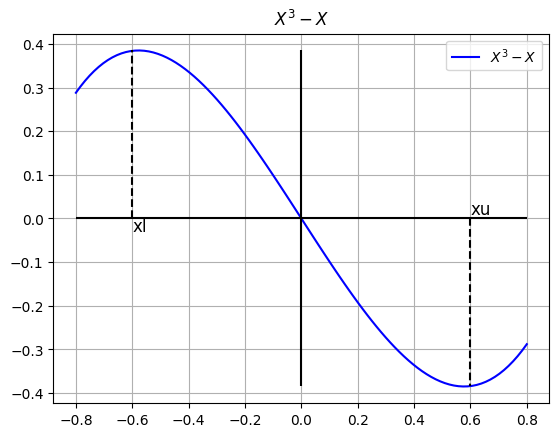

In [250]:
# @title Método de bisección
import numpy as np
import matplotlib.pyplot as plt
plt.figure()

x = np.linspace(-0.8,0.8, 100)
y = x**3-x

fig, ax = plt.subplots()
ax.plot(x,y,color='blue',label="$X^3 - X$")
ax.grid()

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(y),ymax=max(y),color='k')
ax.hlines(y=0,xmin=min(x),xmax=max(x),color='k')

## límites xl y xu
ax.vlines(x=0.6, ymin=0, ymax=min(y), color='k', linestyle='--')
ax.vlines(x=-0.6, ymin=0, ymax=max(y), color='k', linestyle='--')

# Agregar texto en una ubicación específica
text_x = 0.6  # Posición en el eje X
text_y = 0  # Posición en el eje Y
ax.text(text_x, text_y+0.01, 'xu', fontsize=12, color='black')
ax.text(-text_x, -1*(text_y+0.03), 'xl', fontsize=12, color='black')

ax.set_title("$X^3-X$")
plt.legend()
plt.show()

Consiste en hallar una raíz aproximada de una función en un intervalo dado.

Tiende a ser menos eficiente por ser más lento, debido a la cantidad de iteraciones que se requieren para lograr un resultado(convergencia).


Consiste en subdividir el intervalo en otros 2 iguales y evaluar la función con el objetivo de ubicar en donde se hace el cambio de signo, y se sigue repitiendo hasta encontrar la raíz.

## Algoritmo para la bisección

1. Encontrar un intervalo en donde $$f(x1)*f(xu)<0$$.
2. Se haya una raíz aproximada:
  $$xr = \frac{xl+xu}{2}$$
3. Encontrar el subintervalo en donde cae la raíz de la siguiente forma:

  * Si $$f(xl)*f(xr) < 0$$ la raíz está entre el intervalo $xl$ y $xr$. Por tal razón, $xu=xr$ y retorno al paso 2.
  * Si $$f(xl)*f(xr) > 0$$ la raíz está entre el intervalo $xr$ y $xu$. Por tal razón, $xl=xr$ y retorno al paso 2.
  * Si $$f(xl)*f(xr) = 0$$ la raíz es $xr$ y termina el cálculo


### Cálculo del error relativo

$$
e_r = \lvert \frac{xr_{actual}-xr_{anterior}}{xr_{actual}}\rvert
$$

### Tolerancia

Es qué tan aproximada será la raíz


### Ejemplo

Calcular la raíz de $f(x)=x^{3}-x$ en el intervalo (0.2, 1.7) con una tolerancia de 1%

### Solución

In [251]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [252]:
# Tomamos el intérvalo inicial y grafiquemos la función dentro de ese valor

x = sp.symbols('x')

y = x**3 - x
print("La función es: ",y)

xl,xu = (0.2,1.7)

print(f"El intervalo es: ({xl},{xu}) ")

fxl, fxu = (round(y.subs({x: xl}), 4), round(y.subs({x: xu}), 4))
print(f"la función evaluada en xl y xu respectivamente : (f({xl})={fxl},  f({xu})={fxu}) ")

La función es:  x**3 - x
El intervalo es: (0.2,1.7) 
la función evaluada en xl y xu respectivamente : (f(0.2)=-0.1920,  f(1.7)=3.2130) 


<Figure size 640x480 with 0 Axes>

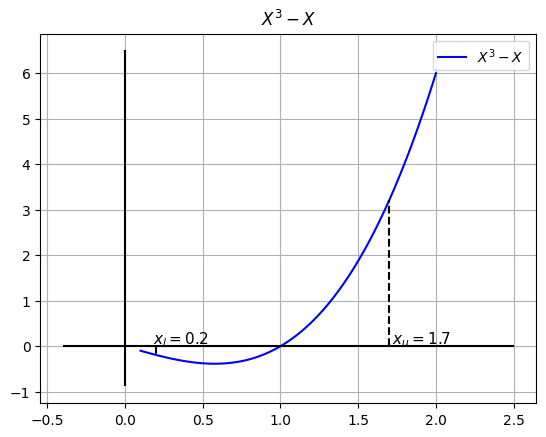

In [253]:
# @title Gráfica incial de la función en el rango especificado
import numpy as np
plt.figure()

r = np.linspace(0.1,2, 100)
fx = [y.subs({x:xi}) for xi in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$X^3 - X$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.5,ymax=max(fx)+0.5,color='k')
ax.hlines(y=0,xmin=min(r)-0.5,xmax=max(r)+0.5,color='k')

## Límites xl y xu
ax.vlines(x=xl, ymin=0, ymax=fxl, color='k', linestyle='--')
ax.vlines(x=xu, ymin=0, ymax=fxu, color='k', linestyle='--')

## Texto de xl y xu
ax.text(xl-0.02, 0.05, f'$x_l={xl}$', fontsize=11, color='black')
ax.text(xu+0.02, 0.05, f'$x_u={xu}$', fontsize=11, color='black')

ax.set_title("$X^3-X$")
ax.grid()
ax.legend()
plt.show()

#### Calculemos ahora la raíz supuesta...

$$xr = \frac{xl+xu}{2}$$

In [254]:
xr = (xl + xu)/2
fxr = round(y.subs({x:xr}),4)
print(" xr = {:.4f}, f(xr) = {:.4f}".format(xr,fxr))

 xr = 0.9500, f(xr) = -0.0926


<Figure size 640x480 with 0 Axes>

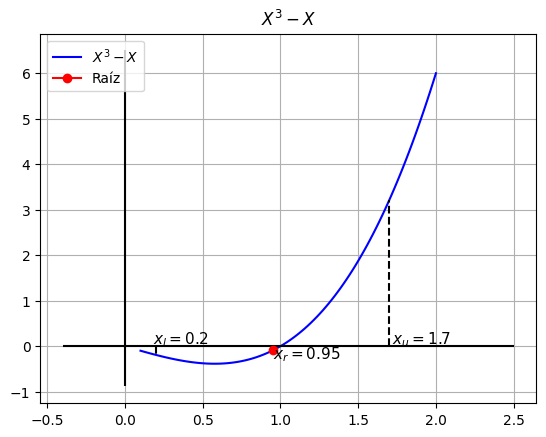

In [255]:
# @title Gráfica incial con el punto de $x_r$
import numpy as np
plt.figure()

r = np.linspace(0.1,2, 100)
fx = [y.subs({x:xi}) for xi in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$X^3 - X$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.5,ymax=max(fx)+0.5,color='k')
ax.hlines(y=0,xmin=min(r)-0.5,xmax=max(r)+0.5,color='k')

## Límites xl y xu
ax.vlines(x=xl, ymin=0, ymax=fxl, color='k', linestyle='--')
ax.vlines(x=xu, ymin=0, ymax=fxu, color='k', linestyle='--')

## Texto de xl y xu
ax.text(xl-0.02, 0.05, f'$x_l={xl}$', fontsize=11, color='black')
ax.text(xu+0.02, 0.05, f'$x_u={xu}$', fontsize=11, color='black')

## Pintamos el punto intermedio
ax.plot(xr,fxr,color='red',label='Raíz',marker='o')
ax.text(xr,fxr-0.18, f'$x_r={xr}$', fontsize=11, color='black')

ax.set_title("$X^3-X$")
ax.grid()
ax.legend()
plt.show()

#### Calculemos el error...



Como es la primer iteración, NO tendremos forma de calcular un error ya que no existe un $xr$ anterior. Para las siguientes iteraciones si vamos a calcular el error tomando la siguiente formula.

$$
e_r = \lvert \frac{Xr_{actual}-Xr_{anterior}}{Xr_{actual}}\rvert = 0
$$

OJO: Solo para la primer iteración se define arbitrariamente

In [256]:
# @title Tabla de iteraciones
import pandas as pd

columnas = ['Xl','Xu','Xr','er(%)','f(Xl)','f(Xu)','f(Xr)']

primer_iter = {'Xl':[xl],'Xu':[xu],'Xr':[xr],'er(%)':[0],'f(Xl)':[fxl],'f(Xu)':[fxu],'f(Xr)':[fxr]}

tabla = pd.DataFrame(data=primer_iter,columns=columnas)
tabla.head(1)

,Xl,Xu,Xr,er(%),f(Xl),f(Xu),f(Xr)
0,0.2,1.7,0.95,0,-0.1920,3.2130,-0.0926


#### Revisemos las condiciones

* Si $$f(xl)*f(xr) < 0$$ la raíz está entre el intervalo xl y xr. Por tal razón, xu=xr y retorno al paso 2.
* Si $$f(xl)*f(xr) > 0$$ la raíz está entre el intervalo xr y xu. Por tal razón, xl=xr y retorno al paso 2.
* Si $$f(xl)*f(xr) = 0$$ la raíz es xr y termina el cálculo


In [257]:
if (fxl * fxr) < 0:
  print("La raíz está entre el intervalo xl y xr")
  xu = xr
elif (fxl*fxr) > 0:
  print("La raíz está entre el intervalo xr y xu")
  xl = xr
elif (fxl*fxr) == 0:
  print("terminé")

La raíz está entre el intervalo xr y xu


#### Repetimos los pasos anteriores para calcular el nuevo Xr y el error

In [258]:
fxl= round(y.subs({x:xl}),4)
fxu= round(y.subs({x:xu}),4)
xr2 = (xl + xu)/2
fxr2 = round(y.subs({x:xr2}),4)
print(" xr = {:.4f}, f(xr) = {:.4f}".format(xr2,fxr2))
error = round(np.abs((xr2-xr)/(xr2))*100,4)
print("El error de este cálculo es: {:.4f}% ".format(error))

 xr = 1.3250, f(xr) = 1.0012
El error de este cálculo es: 28.3019% 


<Figure size 640x480 with 0 Axes>

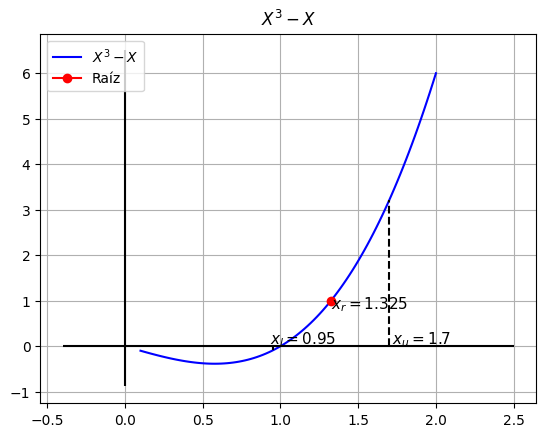

In [259]:
# @title Gráfica del método para la iteración 2
import numpy as np
plt.figure()

r = np.linspace(0.1,2, 100)
fx = [y.subs({x:xi}) for xi in r]

fig, ax = plt.subplots()
ax.plot(r,fx,color='blue',label="$X^3 - X$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=min(fx)-0.5,ymax=max(fx)+0.5,color='k')
ax.hlines(y=0,xmin=min(r)-0.5,xmax=max(r)+0.5,color='k')

## Límites xl y xu
ax.vlines(x=xl, ymin=0, ymax=fxl, color='k', linestyle='--')
ax.vlines(x=xu, ymin=0, ymax=fxu, color='k', linestyle='--')

## Texto de xl y xu
ax.text(xl-0.02, 0.05, f'$x_l={xl}$', fontsize=11, color='black')
ax.text(xu+0.02, 0.05, f'$x_u={xu}$', fontsize=11, color='black')

## Pintamos el punto intermedio
ax.plot(xr2,fxr2,color='red',label='Raíz',marker='o')
ax.text(xr2,fxr2-0.18, f'$x_r={xr2}$', fontsize=11, color='black')

ax.set_title("$X^3-X$")
ax.grid()
ax.legend()
plt.show()

In [260]:
# @title Actualizamos la tabla de iteraciones
nueva_fila = {'Xl': xl, 'Xu': xu, 'Xr': xr2, 'er(%)': error, 'f(Xl)': fxl, 'f(Xu)': fxu, 'f(Xr)':fxr2}
tabla = tabla.append(nueva_fila, ignore_index=True)
tabla.head()

<ipython-input-260-912f58af88d4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append(nueva_fila, ignore_index=True)


,Xl,Xu,Xr,er(%),f(Xl),f(Xu),f(Xr)
0,0.20,1.7,0.950,0.0000,-0.1920,3.2130,-0.0926
1,0.95,1.7,1.325,28.3019,-0.0926,3.2130,1.0012


<Figure size 640x480 with 0 Axes>

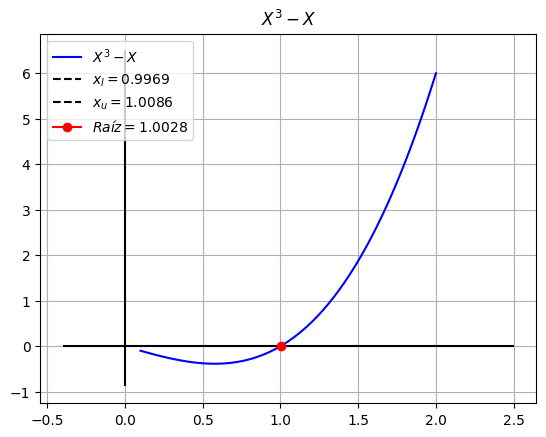

,Xl,Xu,Xr,er(%),f(Xl),f(Xu),f(Xr)
0,0.2000,1.7000,0.9500,0.789474,-0.1920,3.2130,-0.0926
1,0.9500,1.7000,1.3250,0.283019,-0.0926,3.2130,1.0012
2,0.9500,1.3250,1.1375,0.164835,-0.0926,1.0012,0.3343
3,0.9500,1.1375,1.0437,0.089873,-0.0926,0.3343,0.0932
4,0.9500,1.0437,0.9969,0.046946,-0.0926,0.0932,-0.0062
5,0.9969,1.0437,1.0203,0.022934,-0.0062,0.0932,0.0418
6,0.9969,1.0203,1.0086,0.011600,-0.0062,0.0418,0.0174
7,0.9969,1.0086,1.0028,0.005784,-0.0062,0.0174,0.0056


In [299]:
# @title iteremos hasta que el error sea de 1%
from IPython.display import HTML, display, clear_output
import matplotlib.pyplot as plt
import matplotlib.animation as animation

##############
x = sp.symbols('x')
y = x**3 - x
print("La función es: ",y)

xl,xu = (0.2,1.7)

##############

tol = 0.01

xr = None
xr_ant = xu
error = tol+1
it = 1

columnas = ['Xl','Xu','Xr','er(%)','f(Xl)','f(Xu)','f(Xr)']
tabla = pd.DataFrame(columns=columnas)

ims = []

while error > tol:
  #Evaluamos la función en los puntos del intervalo.
  fxl= round(y.subs({x:xl}),4)
  fxu= round(y.subs({x:xu}),4)

  ##################
  plt.figure()
  fig, ax = plt.subplots()

  r = np.linspace(0.1,2, 100)
  fx = [y.subs({x:xi}) for xi in r]

  ax.plot(r,fx,color='blue',label="$X^3 - X$")
  ## Plano cartesiano (Ejes)
  ax.vlines(x=0,ymin=round(min(fx),4)-0.5,ymax=round(max(fx),4)+0.5,color='k')
  ax.hlines(y=0,xmin=round(min(r),4)-0.5,xmax=round(max(r),4)+0.5,color='k')

  ax.set_title("$X^3-X$")
  ax.grid()

  ##################

  ## Límites xl y xu
  ax.vlines(x=xl, ymin=0, ymax=fxl, color='k', linestyle='--',label=f'$x_l=${xl}')
  ax.vlines(x=xu, ymin=0, ymax=fxu, color='k', linestyle='--',label=f'$x_u=${xu}')

  #Calculamos la raíz
  xr = round((xl + xu)/2,4)
  fxr = round(y.subs({x:xr}),4)

  ## Pintamos el punto intermedio
  ax.plot(xr,fxr,color='red',label=f'$Raíz=${xr}',marker='o')
  ax.legend()
  plt.show()

  error = np.abs((xr-xr_ant)/(xr))

  nueva_fila = {'Xl': xl, 'Xu': xu, 'Xr': xr, 'er(%)': error, 'f(Xl)': fxl, 'f(Xu)': fxu, 'f(Xr)':fxr}
  nueva_fila = pd.DataFrame([nueva_fila])

  tabla = pd.concat([tabla, nueva_fila], ignore_index=True)

  display(HTML(tabla.head(it).to_html()))

  if (fxl * fxr) < 0:
    xu = xr
  elif (fxl*fxr) > 0:
    xl = xr
  elif (fxl*fxr) == 0:
    print(f"La raiz está en: ({xr},{fxr})")
    break

  xr_ant = xr
  it+=1

  print("")
  input()
  clear_output(wait=True)


In [319]:
# @title Grafico dinámico (movie del método)
# Librerias necesarias para realizar el gráfico
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation, rc
from IPython.display import HTML;
rc('animation', html='html5');

x = sp.symbols('x')
y = x**3 - x

# Plantilla sobre la cual se realiza el gráfico
r = np.linspace(0.1,2, 100)
fx = [y.subs({x:xi}) for xi in r]

fig, ax = plt.subplots()

ax.plot(r,fx,color='blue',label="$X^3 - X$")

## Plano cartesiano (Ejes)
ax.vlines(x=0,ymin=round(min(fx),4)-0.5,ymax=round(max(fx),4)+0.5,color='k')
ax.hlines(y=0,xmin=round(min(r),4)-0.5,xmax=round(max(r),4)+0.5,color='k')

ax.set_title("$X^3-X$")
ax.grid()
# Se definen los atributos que debe tener la linea o en este caso el punto que se va a pintar en cada iteracion
linea, = ax.plot([],[],'o',color = 'r', label = '')

# Realizamos una función que grafique el punto especifico uno a uno

frames = len(tabla);
def graficar(i):

  x = tabla['Xr'].to_list()
  y = tabla['f(Xr)'].to_list()

  linea.set_data(x[i],y[i])
  linea.set_label(f"Raíz={x[i]}")
  ax.legend()
  return (linea,)

plt.close()

In [321]:
# Ejecutamos la animación para que se genere y quede en loop mostrando su resultado.
anim = animation.FuncAnimation(fig, graficar, frames=frames, interval=1000,repeat=False)
anim


<ipython-input-319-870bb3ef07f7>:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  linea.set_data(x[i],y[i])
